In [1]:
import os 
from dotenv import load_dotenv 
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq
from langchain.agents import create_agent

In [20]:
import langchain
langchain.__version__

'1.2.0'

In [3]:
llm = ChatGroq(model = "llama-3.3-70b-versatile")

In [9]:
def get_weather(city: str) -> str:
    """Get the weather for a city."""
    return f"The weather in {city} is sunny."

In [10]:
agent = create_agent(
    model = llm,
    tools = [get_weather],
    system_prompt = "You are a helpful assistant."
)

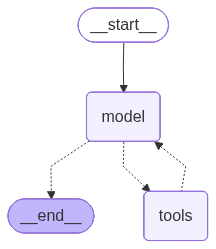

In [11]:
agent

In [13]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is the weather like in New York?"}]})

In [15]:
response

{'messages': [HumanMessage(content='What is the weather like in New York?', additional_kwargs={}, response_metadata={}, id='054902a9-42d4-4576-9984-fc9888212961'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9t2v1phd0', 'function': {'arguments': '{"city":"New York"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 227, 'total_tokens': 242, 'completion_time': 0.04474849, 'prompt_time': 0.023149198, 'queue_time': 0.090459227, 'total_time': 0.067897688}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b75c4-c72c-7ee1-9044-2f30844ca952-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'New York'}, 'id': '9t2v1phd0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 227, 'output_tokens': 15, 'total_tokens': 242}),
  ToolMessage(cont

In [14]:
response["messages"][-1].content

'The weather in New York is sunny.'

In [19]:
agent.invoke({"messages": "What is the weather like in New Yourk?"})

{'messages': [HumanMessage(content='What is the weather like in New Yourk?', additional_kwargs={}, response_metadata={}, id='ff1f4706-b91a-4ae3-83fa-ab2ff99b26bc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 's40qhejnj', 'function': {'arguments': '{"city":"New York"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 228, 'total_tokens': 243, 'completion_time': 0.045764637, 'prompt_time': 0.033825971, 'queue_time': 0.048607921, 'total_time': 0.079590608}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_f8b414701e', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b75c7-a4b6-7123-bcb6-87c525d4418a-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'New York'}, 'id': 's40qhejnj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 228, 'output_tokens': 15, 'total_tokens': 243}),
  ToolMessage(co